In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/astro/users/ctslater/.local/lib/python3.6/site-packages')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.coordinates
import astropy.units as u

#plt.style.use(("paper_plots.mplstyle"))

matplotlib.rcParams['figure.dpi'] = 70

from astropy.coordinates import Galactocentric, Galactic, ICRS
from astropy.coordinates import (CartesianRepresentation,
                                 CartesianDifferential)

import healpy as hp

In [2]:
angle_lon, angle_lat = hp.pix2ang(hp.order2nside(7), np.arange(hp.nside2npix(hp.order2nside(7))),
                                    lonlat=True, nest=True)

coords = astropy.coordinates.SkyCoord(angle_lon*u.deg, angle_lat*u.deg, 10*u.kpc, frame='galactic')

In [3]:
galactocentric_angle = np.arctan2(coords.galactocentric.y, coords.galactocentric.x)
circular_vel = 210*u.km/u.s
vertical_vel = 0.0*u.km/u.s

gc_coord = Galactocentric(x=coords.galactocentric.x, y=coords.galactocentric.y, z=coords.galactocentric.z,
                          v_x = circular_vel * np.sin(galactocentric_angle),
                          v_y = circular_vel * np.cos(galactocentric_angle),
                          v_z = vertical_vel)

galactic_coords_w_pm = gc_coord.transform_to(Galactic)

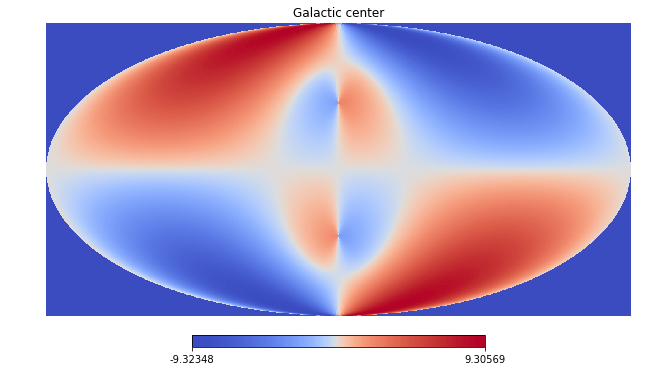

In [7]:
# galactic_coords_w_pm.pm_b

hp.mollview(galactic_coords_w_pm.pm_b.to_value(),
            title="Galactic center",
            #rot=(266.4 - 180, 28.94, -57 - 180),
            #rot=(266.4 - 180, 28.94, -57),
            cmap='coolwarm', #min=-0.7, max=0.7,
            xsize=1400,  #min=0.1, max=2.0,
            nest=True, norm='hist')

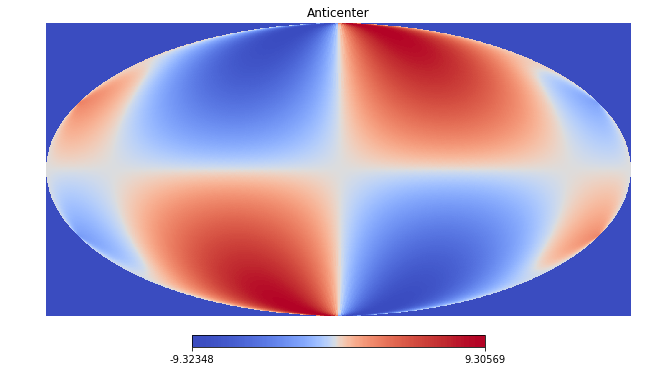

In [8]:
hp.mollview(galactic_coords_w_pm.pm_b.to_value(), title="Anticenter",
            rot=(180, 0, 0),
            cmap='coolwarm', #min=-0.7, max=0.7,
            xsize=1400,  #min=0.1, max=2.0,
            nest=True, norm='hist')